# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\19193\Desktop\BEE4750\hw\hw1-AnnieStewart`
   Installed GR_jll ────────────────────── v0.73.5+0
   Installed ArnoldiMethod ─────────────── v0.4.0
   Installed OffsetArrays ──────────────── v1.14.0
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed NetworkLayout ─────────────── v0.4.6
   Installed ConcurrentUtilities ───────── v2.4.1
   Installed StaticArrays ──────────────── v1.9.4
   Installed StaticArraysCore ──────────── v1.4.2
   Installed Ratios ────────────────────── v0.4.5
   Installed GraphRecipes ──────────────── v0.5.13
   Installed GLFW_jll ──────────────────── v3.3.9+0
   Installed CodecZlib ─────────────────── v0.7.4
   Installed TranscodingStreams ────────── v0.10.9
   Installed TableTraits ───────────────── v1.0.1
   Installed ZMQ ───────────────────────── v1.2.5
   Installed Xorg_libxcb_jll ───────────── v1.15.0+0
   Installed GeometryTypes ─────────────── v0.8.5
   Installed Inflate ───────────────────── v0.1.5
   Install

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In the origional code, it always returns 0 as the minimum value instead of 78, which is the minimum value in the entered array. 
This is because min_value is initialized to 0, so if all the values in the entered array are greater than 0, it will not work correctly
To fix this, min_value needs to be initialized to the first element in the array

In [14]:
#Corrected code
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

The errors in the origional code include the Statistics module not being importorted, 
and the class_average function was not correctly called with student_grades 

In [15]:
#Corrected code
using Statistics
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

The error in the origional is that there is no method that matches the set index 
The function initilizaes outcomes to zero, but an array to hold boolean values should be used instead

In [16]:
#Corrected code 

using Random 

function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = Bool[]

for i = 1:n_trials
    roll_sum = sum(passadieci())
    push!(outcomes, roll_sum > 11)
end
win_prob = mean(outcomes) # compute average number of wins
@show win_prob;

win_prob = 0.368


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

The purpose of mystery function is when you input an array of values, it returns the array in the origional order with the duplicates removed.
There is a built in Julia function called unique that does the same thing as mystery_function. All you have to do is call the function with the input of the array of values. 

In [18]:
#Using built in Julia function

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1] 

@show unique(list_of_values); #built in function unique 

unique(list_of_values) = [1, 2, 3, 4]


In [17]:
function mystery_function(values)
    y = [] #create emptu array 
    for v in values 
        if !(v in y)
            append!(y, v) #add unique values back into array
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]

@show mystery_function(list_of_values); #returns list of values array containing only unique elements 

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


In the following code, the function compute_mean loops through the elements of the random vector to calculate the total sum of the elements in the vector. The mean is then calculated by dividing the sum by the length of the vector. The function compute_mean is then called with the random vector as input and the mean is computed. Using broadcasting, the mean is then subracted from each element in the vector and creates a new vector. Then it is checked if the new vector has a mean of zero, and the new vector is returned. 

In [34]:
#generate random vector length of 10
random_vect = rand(10) 

#function to compute mean of vector
function compute_mean(v)
    sum = 0.0
    for y in v 
        sum += y 
    end 
    mean_vect = sum / length(v)
    return mean_vect
end 

# Computes mean of random vector rand
mean_vect = compute_mean(random_vect)

#Subtract mean from each element using broadcasting 
new_vector = random_vect .- mean_vect

#Check new vector has mean of zero 
new_mean = compute_mean(new_vector)

#show outputs 
@show new_mean
@show new_vector 

new_mean = 8.881784197001253e-17
new_vector = [0.11193184935119782, -0.1595331721234442, -0.4589829060446905, 0.3034197518627335, 0.32518097636923615, -0.13495361004745143, 0.02161127101061555, -0.01786804321707991, 0.1338401602622531, -0.1246462774233692]


10-element Vector{Float64}:
  0.11193184935119782
 -0.1595331721234442
 -0.4589829060446905
  0.3034197518627335
  0.32518097636923615
 -0.13495361004745143
  0.02161127101061555
 -0.01786804321707991
  0.1338401602622531
 -0.1246462774233692


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

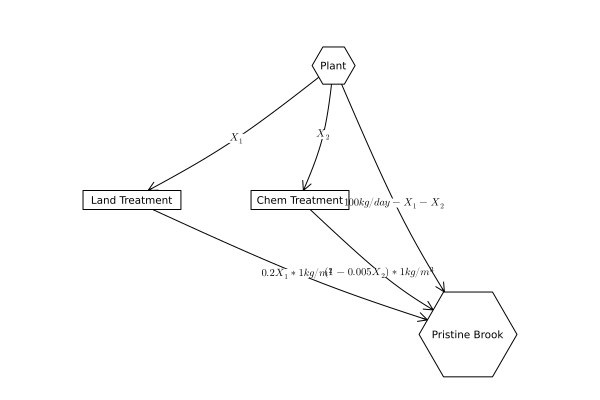

In [40]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = (Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"100 kg/day - X_1 - X_2",(2, 4) => L"0.2 X_1*1kg/m^2",(3, 4) => L"(1-0.005 X_2) * 1kg/m^3"))
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).


For Chemical Treatment, the problem statement gives that the procedure costs $1.50$ dollars per $m^3$ of wastewater treated. Therefore, the cost would be $C_{chem}$ = $1.50$ * $X_2$ where $X_2$ is the quantity of wastewater $(m^3/day)$ treated. The amount of YUK discharged as a result of the Chemical Treatment will be $YUK_{chem}$ = $e$ * $1 kg/m^3$ * $X_2$ where $1 kg/m^3$ is the amount of YUK wastewater contains and $e = 1 - 0.005X_2$ which is the effeciency of removal.

For Land Treatment, the problem statement states that the cost $C_{land} = X_1^2 / 20$ dollars per day, where $X_1$ is the amount of wastewater disposed of on land $(m^3/day)$. 20 percent of the YUK will drain into the stream so that $YUK_{land} = .20X_1 * 1 kg/m^3$. 

Finally, the YUK in the wastewater that goes right from the Plant to the Brook equals $YUK_{NoTreatment} = (100 kg/day - X_1 -X_2) * 1 kg/m^3$ where $100 m^3/day$ is the total wastewater the plant produces. There is no associate cost with this stream since there is no treatment. 

In conclusion, $C_{total} = C_{chem} + C_{land}$ and $YUK_{total} = YUK_{chem} + YUK_{land} + YUK_{NoTreatment}$


-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.


In [58]:
#create function to calculate YUK Concentration and Cost 
function YUK_treatment(X1, X2)

        #calculate costs
        Cost_chem = 1.50 * X2
        Cost_land = (X1^2)/20
        
        #calculate YUK concentrations
        #eff of chem treatment 
        Chem_e = 1 - (0.005 * X2)
        
        YUK_chem = (1 - Chem_e) * X2 * 1
        YUK_land = 0.20 * X1 
        YUK_no_treatment = (100 - (X1 + X2)) * 1 

        #Calculate totals 
        YUK_total = YUK_chem + YUK_land + YUK_no_treatment
        Cost_total = Cost_chem + Cost_land 
        
        #output totals 
        return (YUK_total, Cost_total)
end 

YUK_treatment(60, 40)

(20.0, 240.0)


-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?



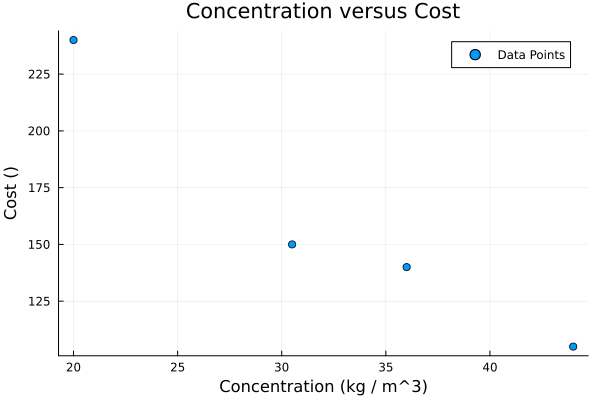

In [56]:
#Plotting results of experiments 
x = [20, 44.0, 36.0, 30.5 ]
y = [240, 105.0, 140.0, 150.0]
scatter(x, y, label = "Data Points", title="Concentration versus Cost", xlabel ="Concentration (kg / m^3)", ylabel = "Cost ()")

The combination of 40, 60 for X1 and X2 produces the optimal concentration and cost of 20 and 240. This adheres to the standard. To find a better solution, generating more precise data points would be helpful. 

## References

List any external references consulted, including classmates.

I used stack overflow to find the unique function for problem 2 https://stackoverflow.com/questions/54652787/julia-function-to-return-non-unique-elements-of-an-array
I consulted this page to learn what Julia broadcasting was https://blog.glcs.io/broadcasting 